In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Data Description

In [234]:
cust_data = pd.read_csv(r'C:\Users\C. Dev\Desktop\ML course\New folder\Customer_DF (1).csv')
cust_transaction_data = pd.read_csv(r'C:\Users\C. Dev\Desktop\ML course\New folder\cust_transaction_details (1).csv')

In [235]:
print("Customer_DF description\n")
print(cust_data.dtypes)
print("\n\n")
print("cust_transaction_details desciption\n")
print(cust_transaction_data.dtypes)

Customer_DF description

Unnamed: 0                 int64
customerEmail             object
customerPhone             object
customerDevice            object
customerIPAddress         object
customerBillingAddress    object
No_Transactions            int64
No_Orders                  int64
No_Payments                int64
Fraud                       bool
dtype: object



cust_transaction_details desciption

Unnamed: 0                           int64
customerEmail                       object
transactionId                       object
orderId                             object
paymentMethodId                     object
paymentMethodRegistrationFailure     int64
paymentMethodType                   object
paymentMethodProvider               object
transactionAmount                    int64
transactionFailed                    int64
orderState                          object
dtype: object


# Data Wrangling

In [245]:
cust_df = pd.DataFrame(data = cust_data)
cust_df.drop(['No_Transactions'],axis = 1, inplace = True)
cust_df.head(10)

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,6,True
5,5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,2,True
6,6,samuel15@saunders-rhodes.com,05045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",1,2,True
7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",5,2,True
8,8,jameslandry@rodriguez.com,1-885-168-1310x338,yz4l2bgbvzra5eb5qcan,c899:ff67:6864:4365:def3:3023:655f:5181,USNS Price\nFPO AE 14661,2,1,False
9,9,ubranch@rivera-parker.info,(772)964-8162x6310,6mpx027neyz6sh04n3ue,86.16.65.228,"6974 Robertson Common Apt. 902\nPort Juanside,...",0,1,True


In [246]:
cust_df['card'] = 0
cust_df['bitcoin'] = 0
cust_df['apple_pay'] = 0
#cust_df['paypal'] = 0

cust_df['orderState_pending'] = 0
#cust_df['orderState_fulfilled'] = 0
cust_df['orderState_failed'] = 0

#cust_df['paymentMethodRegistrationFailure_0'] = 0
cust_df['paymentMethodRegistrationFailure_1'] = 0

#cust_df['transactionFailed_0'] = 0
cust_df['transactionFailed_1'] = 0




z = []
for i in cust_transaction_data['customerEmail'].unique():
    z.append(i)
    z.append(cust_transaction_data[cust_transaction_data['customerEmail']==i]['paymentMethodType'].values)
    
card = 0   
bitcoin = 0
apple_pay = 0
paypal = 0
 
lenz = len(z)

for i in range(lenz):
    if i%2 != 0:
        for j in z[i]:
            if j == 'card':
                card += 1
            elif j == 'bitcoin':
                bitcoin +=1
            elif j == 'apple pay':
                apple_pay += 1
            elif j == 'paypal':
                paypal += 1
        cust_email = z[i-1]
        cust_df.loc[cust_df['customerEmail'] == cust_email, 'card'] = card
        cust_df.loc[cust_df['customerEmail'] == cust_email, 'bitcoin'] = bitcoin
        cust_df.loc[cust_df['customerEmail'] == cust_email, 'apple_pay']= apple_pay
  #      cust_df.loc[cust_df['customerEmail'] == cust_email, 'paypal'] = paypal
        card = 0
        bitcoin = 0
        apple_pay = 0
        paypal = 0

z = []
for i in cust_transaction_data['customerEmail'].unique():
    z.append(i)
    z.append(cust_transaction_data[cust_transaction_data['customerEmail']==i]['orderState'].values)
    
               
pending = 0
fulfilled = 0
failed = 0

lenz = len(z)

for i in range(lenz):
    if i%2 != 0:
        for j in z[i]:
            if j == 'pending':
                pending += 1
            elif j == 'fulfilled':
                fulfilled += 1
            elif j == 'failed':
                failed += 1
        cust_email = z[i-1]
        cust_df.loc[cust_df['customerEmail'] == cust_email, 'orderState_pending'] = pending
 #       cust_df.loc[cust_df['customerEmail'] == cust_email, 'orderState_fulfilled'] = fulfilled
        cust_df.loc[cust_df['customerEmail'] == cust_email, 'orderState_failed']= failed
        pending = 0
        fulfilled = 0
        failed = 0

z = []
for i in cust_transaction_data['customerEmail'].unique():
    z.append(i)
    z.append(cust_transaction_data[cust_transaction_data['customerEmail']==i]['paymentMethodRegistrationFailure'].values)
        
        
paymentmethodregistrationfailure0 = 0
paymentmethodregistrationfailure1 = 0

lenz = len(z)

for i in range(lenz):
    if i%2 != 0:
        for j in z[i]:
            if j == 0:
                paymentmethodregistrationfailure0 += 1
            elif j == 1:
                paymentmethodregistrationfailure1 += 1
        cust_email = z[i-1]
  #      cust_df.loc[cust_df['customerEmail'] == cust_email, 'paymentMethodRegistrationFailure_0'] = paymentmethodregistrationfailure0
        cust_df.loc[cust_df['customerEmail'] == cust_email, 'paymentMethodRegistrationFailure_1'] = paymentmethodregistrationfailure1
        paymentmethodregistrationfailure0 = 0
        paymentmethodregistrationfailure1 = 0

        
z = []
for i in cust_transaction_data['customerEmail'].unique():
    z.append(i)
    z.append(cust_transaction_data[cust_transaction_data['customerEmail']==i]['transactionFailed'].values)
        
        
transactionfailed0 = 0
transactionfailed1 = 0

lenz = len(z)

for i in range(lenz):
    if i%2 != 0:
        for j in z[i]:
            if j == 0:
                transactionfailed0 += 1
            elif j == 1:
                transactionfailed1 += 1
        cust_email = z[i-1]
   #     cust_df.loc[cust_df['customerEmail'] == cust_email, 'transactionFailed_0'] = transactionfailed0
        cust_df.loc[cust_df['customerEmail'] == cust_email, 'transactionFailed_1'] = transactionfailed1
        transactionfailed0 = 0
        transactionfailed1 = 0

cust_df.drop(['Unnamed: 0','customerEmail','customerPhone','customerDevice','customerIPAddress','customerBillingAddress'],axis = 1, inplace = True)
cust_df.head()


,No_Orders,No_Payments,Fraud,card,bitcoin,apple_pay,orderState_pending,orderState_failed,paymentMethodRegistrationFailure_1,transactionFailed_1
0,2,1,False,2,0,0,1,0,2,0
1,3,7,True,0,3,0,0,0,1,1
2,3,2,False,5,0,0,0,1,0,2
3,3,1,False,3,0,0,0,0,0,0
4,7,6,True,4,0,3,0,1,0,2


# Data Visualisation

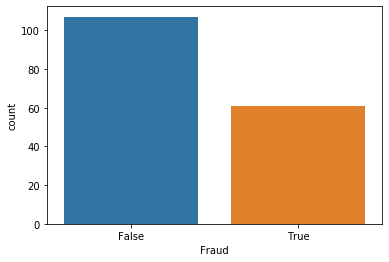

In [228]:
sns.countplot(x = "Fraud", data = cust_df)
plt.show()

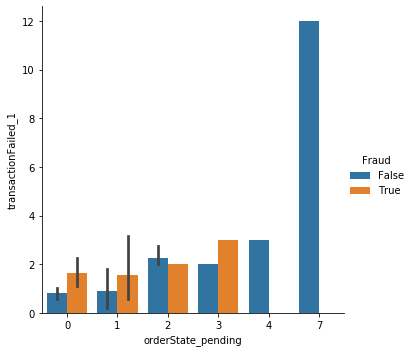

In [195]:
sns.catplot(x="orderState_pending", y="transactionFailed_1", hue = "Fraud",kind="bar", data=cust_df);
plt.show()

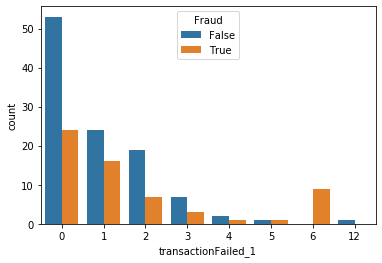

In [196]:
sns.countplot(x = "transactionFailed_1",  hue = "Fraud", data = cust_df)
plt.show()

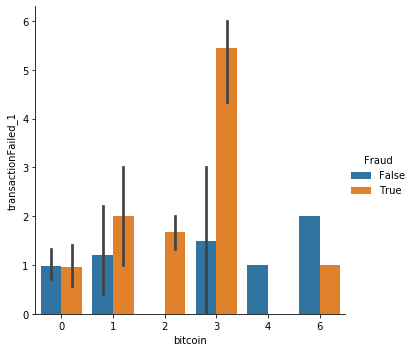

In [197]:
sns.catplot(x="bitcoin", y="transactionFailed_1", hue = "Fraud",kind="bar", data=cust_df);
plt.show()

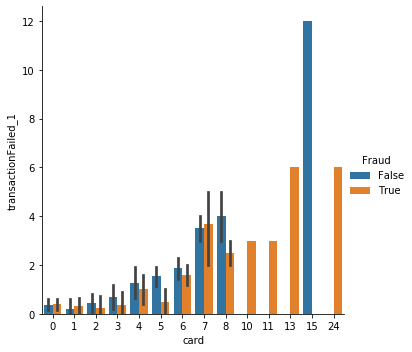

In [198]:
sns.catplot(x="card", y="transactionFailed_1", hue = "Fraud",kind="bar", data=cust_df);
plt.show()

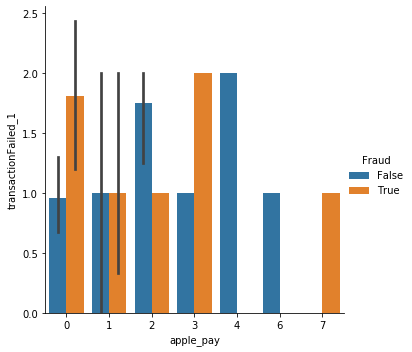

In [199]:
sns.catplot(x="apple_pay", y="transactionFailed_1", hue = "Fraud",kind="bar", data=cust_df);
plt.show()

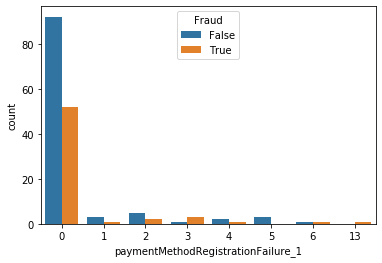

In [200]:
sns.countplot(x = "paymentMethodRegistrationFailure_1", hue = "Fraud", data = cust_df)
plt.show()

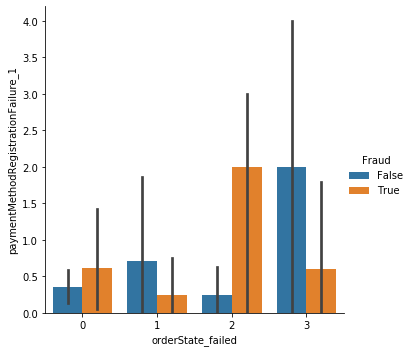

In [202]:
sns.catplot(x="orderState_failed", y="paymentMethodRegistrationFailure_1", hue = "Fraud",kind="bar", data=cust_df);
plt.show()

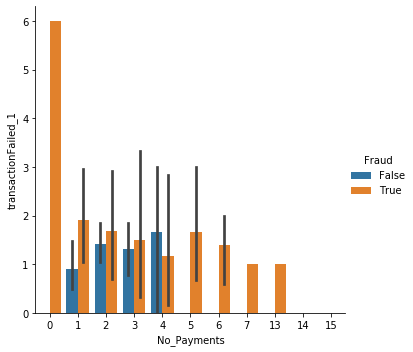

In [203]:
sns.catplot(x="No_Payments", y="transactionFailed_1", hue = "Fraud",kind="bar", data=cust_df);
plt.show()

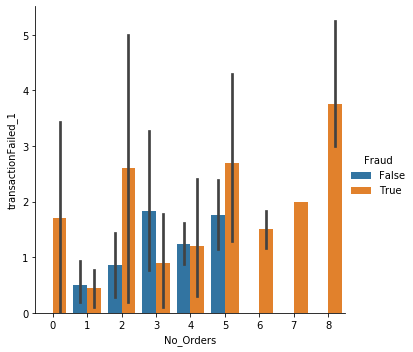

In [204]:
sns.catplot(x="No_Orders", y="transactionFailed_1", hue = "Fraud",kind="bar", data=cust_df);
plt.show()

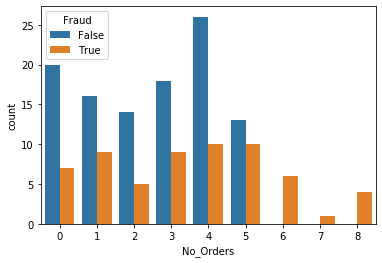

In [205]:
sns.countplot(x = "No_Orders", hue = "Fraud", data = cust_df)
plt.show()

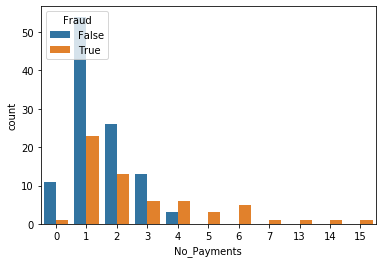

In [206]:
sns.countplot(x = "No_Payments", hue = "Fraud", data = cust_df)
plt.show()

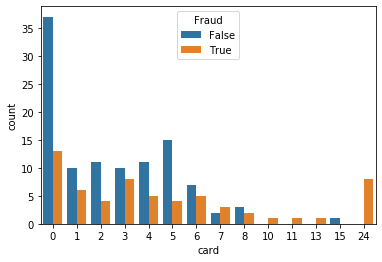

In [207]:
sns.countplot(x = "card", hue = "Fraud", data = cust_df)
plt.show()

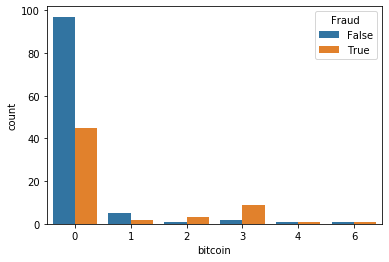

In [244]:
sns.countplot(x = "bitcoin", hue = "Fraud", data = cust_df)
plt.show()

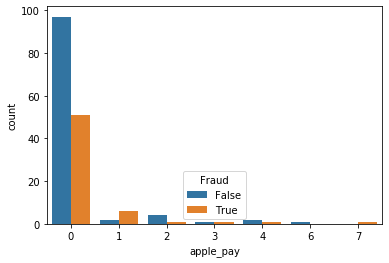

In [209]:
sns.countplot(x = "apple_pay", hue = "Fraud", data = cust_df)
plt.show()

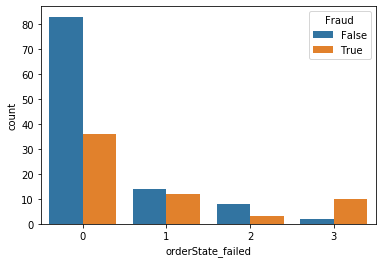

In [211]:
sns.countplot(x = "orderState_failed", hue = "Fraud", data = cust_df)
plt.show()

# Model Preparation

In [238]:
outcomes = cust_df['Fraud']
features_raw = cust_df.drop('Fraud',axis =1)
features = pd.get_dummies(features_raw)
features

,No_Orders,No_Payments,card,bitcoin,apple_pay,orderState_pending,orderState_failed,paymentMethodRegistrationFailure_1,transactionFailed_1
0,2,1,2,0,0,1,0,2,0
1,3,7,0,3,0,0,0,1,1
2,3,2,5,0,0,0,1,0,2
3,3,1,3,0,0,0,0,0,0
4,7,6,4,0,3,0,1,0,2
...,...,...,...,...,...,...,...,...,...
163,3,1,3,0,0,0,1,0,0
164,5,3,6,0,0,0,0,0,1
165,4,2,24,3,0,0,3,0,6
166,6,6,6,2,0,0,1,0,2


# Training and Testing Model Using Decision Trees

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.3, random_state=42)

In [240]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [241]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9743589743589743
The test accuracy is 0.7254901960784313


In [221]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

train_results = confusion_matrix(y_train, y_train_pred)
print("Train confusion matrix : ",train_results)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy (%) : ",train_accuracy*100)
train_report = classification_report(y_train, y_train_pred) 
print("Train Report : ",train_report)
logloss = log_loss(y_train, y_train_pred, eps = 1e-15, normalize = True, sample_weight = None, labels = None) 
print("Train Log Loss : ",logloss)

print("\n\n\n")



test_results = confusion_matrix(y_test, y_test_pred)
print("Test confusion matrix : ",test_results)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (%) : ",test_accuracy*100)
test_report = classification_report(y_test, y_test_pred) 
print("Test Report : ",test_report)
logloss = log_loss(y_test, y_test_pred, eps = 1e-15, normalize = True, sample_weight = None, labels = None) 
print("Test Log Loss : ",logloss)


Train confusion matrix :  [[79  0]
 [ 3 35]]
Train Accuracy (%) :  97.43589743589743
Train Report :                precision    recall  f1-score   support

       False       0.96      1.00      0.98        79
        True       1.00      0.92      0.96        38

    accuracy                           0.97       117
   macro avg       0.98      0.96      0.97       117
weighted avg       0.98      0.97      0.97       117

Train Log Loss :  0.8856096511515568




Test confusion matrix :  [[22  6]
 [ 8 15]]
Test Accuracy (%) :  72.54901960784314
Test Report :                precision    recall  f1-score   support

       False       0.73      0.79      0.76        28
        True       0.71      0.65      0.68        23

    accuracy                           0.73        51
   macro avg       0.72      0.72      0.72        51
weighted avg       0.72      0.73      0.72        51

Test Log Loss :  9.481326806143741


# Hyper Parameters Tuning using GridSearchCV

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state = 23)
parameters = {'max_depth': np.arange(3, 21), 'min_samples_leaf': np.arange(2, 11), 'min_samples_split': np.arange(4, 11)}
scorer = make_scorer(accuracy_score)
grid = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)


# TODO: Train the model
grid_fit = grid.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
print(best_clf)

# TODO: Make predictions
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

# TODO: Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=23, splitter='best')
The training accuracy is 0.8205128205128205
The test accuracy is 0.7843137254901961


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [243]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

train_results = confusion_matrix(y_train, y_train_pred)
print("Train confusion matrix : ",train_results)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy (%) : ",train_accuracy*100)
train_report = classification_report(y_train, y_train_pred) 
print("Train Report : ",train_report)
logloss = log_loss(y_train, y_train_pred, eps = 1e-15, normalize = True, sample_weight = None, labels = None) 
print("Train Log Loss : ",logloss)

print("\n\n\n")



test_results = confusion_matrix(y_test, y_test_pred)
print("Test confusion matrix : ",test_results)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (%) : ",test_accuracy*100)
test_report = classification_report(y_test, y_test_pred) 
print("Test Report : ",test_report)
logloss = log_loss(y_test, y_test_pred, eps = 1e-15, normalize = True, sample_weight = None, labels = None) 
print("Test Log Loss : ",logloss)


Train confusion matrix :  [[79  0]
 [21 17]]
Train Accuracy (%) :  82.05128205128204
Train Report :                precision    recall  f1-score   support

       False       0.79      1.00      0.88        79
        True       1.00      0.45      0.62        38

    accuracy                           0.82       117
   macro avg       0.90      0.72      0.75       117
weighted avg       0.86      0.82      0.80       117

Train Log Loss :  6.199267558060892




Test confusion matrix :  [[27  1]
 [10 13]]
Test Accuracy (%) :  78.43137254901961
Test Report :                precision    recall  f1-score   support

       False       0.73      0.96      0.83        28
        True       0.93      0.57      0.70        23

    accuracy                           0.78        51
   macro avg       0.83      0.76      0.77        51
weighted avg       0.82      0.78      0.77        51

Test Log Loss :  7.449555685126426


Feature ranking:
1. feature 1 (0.402327)
2. feature 3 (0.323956)
3. feature 0 (0.107878)
4. feature 8 (0.067087)
5. feature 6 (0.057722)
6. feature 5 (0.041029)
7. feature 7 (0.000000)
8. feature 4 (0.000000)
9. feature 2 (0.000000)


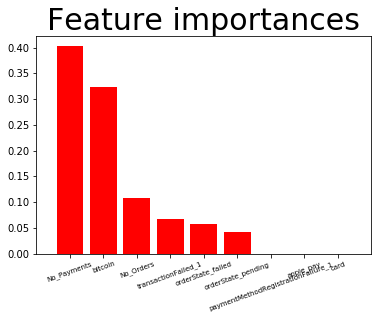

In [247]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_features=3, min_samples_split=3,
                             max_depth=None, min_samples_leaf=10)


forest=clf.fit(X_train, y_train)

#label for x-axis
features_name = np.array(X_train.columns.values)



importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.tree_.feature],   axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances 
plt.figure()
plt.title("Feature importances",size=30)
plt.bar(range(X_train.shape[1]), importances[indices],yerr=std[indices], color='r' , align="center")
plt.xticks(range(X_train.shape[1]), features_name[indices],rotation=20,fontsize = 7)
plt.xlim([-1, X_train.shape[1]])
plt.show()
